In [6]:
%run ImportData.ipynb

In [7]:
#IMPORTATION DES DONNEES EXPERTISEES
donnees,quanti,quali=FonctionImportDonnees("https://raw.githubusercontent.com/etudiantdatascience/TER-reduction-dimension/master/Data/semis.xlsx")

In [9]:
# Import des librairies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

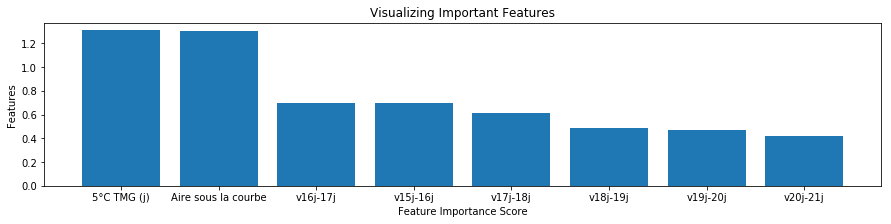

1
0.9305555555555556


In [10]:
# Transformation des variables en variables numériques
for variableQuali in quali:
    valeur=donnees[variableQuali].drop_duplicates().values
    donnees[variableQuali]=donnees[variableQuali].replace(valeur,list(range(len(valeur))))

importance=np.zeros(len(quanti))

for i in quali:
    clf = RandomForestClassifier(n_estimators=50, max_depth=15,
                                 random_state=4,criterion='gini') # Fonction clé de la méthode
    clf.fit(donnees[quanti],donnees['zone'])
    importance=importance+clf.feature_importances_ #Paramètre pour la reduction de dimension

feature_imp = pd.Series(importance,index=quanti).sort_values(ascending=False)
x=np.arange(len(feature_imp.values))
fig, axes = plt.subplots(figsize=(15,3))
plt.bar(x,feature_imp.values)
plt.xticks(x, feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
#print(clf.predict([[0, 0, 0, 0]]))

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(donnees[quanti],donnees['zone'],test_size=0.3,random_state=4) # Vérifier la qualité

forest=RandomForestClassifier(n_estimators=500, max_depth=15,criterion='gini')

forest = forest.fit(X_train,y_train)
print(1-forest.oob_score)
print(1-forest.score(X_test,y_test))